# Final project, Numerical Analysis 2022-2023


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
!unzip gdrive/My\ Drive/mnist.npz

Archive:  gdrive/My Drive/mnist.npz
  inflating: arr_0.npy               
  inflating: arr_1.npy               
  inflating: arr_2.npy               
  inflating: arr_3.npy               


In [3]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.load('arr_0.npy')
y_train = np.load('arr_1.npy')
x_test  = np.load('arr_2.npy')
y_test  = np.load('arr_3.npy')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### **Plotting one image**
How do we plot the images? `pyplot`, which has been imported by the first line of the previous cell, contains a command called `imshow`, that can be used to plot images.

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed.

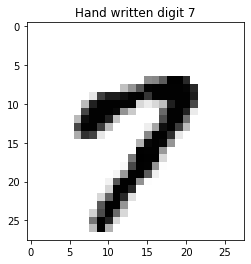

In [4]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
plt.imshow(x_train[N], cmap='gray_r')
_ = plt.title('Hand written digit '+str(y_train[N]))


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.

**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

### **Solution**

In [5]:
def d_infty(a,b):
  return np.max(np.abs(b-a))

In [6]:
def d_one(a,b):
  return np.sum(np.abs(b-a))

In [7]:
def d_two(a,b):
  return np.sqrt(np.sum((b-a)**2))

The distance functions were timed below


In [8]:
a = x_train[np.random.randint(0, 60000-1)]
b = x_train[np.random.randint(0, 60000-1)]

%timeit d_infty(a, b)
%timeit d_one(a, b)
%timeit d_two(a, b)

9.3 µs ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.84 µs ± 270 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.8 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


They all appeared to be working fast.

# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).


### **Solution**
A matrix containing all zero values was initialized and then its values (except those on the main diagonal) were changed. The values on the diagonal were kept as zero because they represent the distance between the same image and that should always be equal to zero, regardless of the chosen distance function. The distances that were already computed were not computed again. This means that, because the distance between images a and b is equal to the distance between images b and a, `D[j,i] = D[i,j]`

In [9]:
def distMatrix(N,dist):
  D = np.zeros((N,N))
  for i in range(0,N):
    for j in range(0, i):
      D[i,j]= dist(x_train[i],x_train[j])
      D[j,i]=D[i,j]
  return D

The function was then timed for the first 100 entries of `x_train`, for all the different distance functions.

In [10]:
%timeit distMatrix(100, d_infty)
%timeit distMatrix(100, d_one)
%timeit distMatrix(100, d_two)

40.9 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
48.2 ms ± 928 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
99.2 ms ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices



### **Solution**
First, the three distance matrices were calculated.

In [11]:
Dinfty=distMatrix(100,d_infty)
D1=distMatrix(100,d_one)
D2=distMatrix(100,d_two)

They were then plotted using the function `imshow` applied to the three matrices.

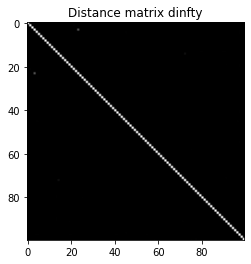

In [12]:
plt.imshow(Dinfty, cmap='gray_r')
_ = plt.title('Distance matrix dinfty')

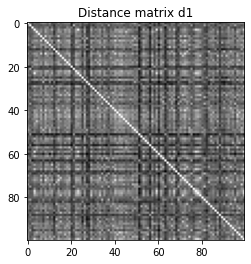

In [13]:
plt.imshow(D1, cmap='gray_r')
_ = plt.title('Distance matrix d1')


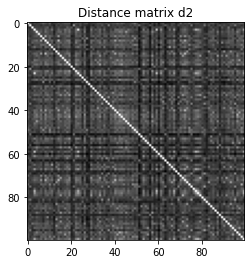

In [14]:
plt.imshow(D2, cmap='gray_r')
_ = plt.title('Distance matrix d2')

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before



### **Solution**
The function was constructed using numpy functions instead of loops, as they work faster.

The elements of the main diagonal were substituted with the value 785, as that is greater than the maximal theoretical value that a cell of the distance matrix could have. This was done to make sure that the index `j` selected by the function was different from `i` for every line `i` of the matrix.





In [15]:
def countFailures(D):
  d = D.copy()
  np.fill_diagonal(d, 28*28 + 1)
  error_counter = 0
  minj=d.argmin(axis = 0)
  return np.mean(y_train[minj] != y_train[0:d.shape[0]])

The function was then timed using the distance matrices previously calculated for all the distance functions.

In [16]:
%timeit countFailures(Dinfty)

41.5 µs ± 924 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%timeit countFailures(D1)

44.7 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%timeit countFailures(D2)

69.8 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Reported below, the values of the function applied to the 3 different distance matrices computed before.

In [19]:
print("d_infty =", countFailures(Dinfty), "     d_1 =", countFailures(D1), "      d_2 =", countFailures(D2))

d_infty = 0.58      d_1 = 0.17       d_2 = 0.17


# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.


### **Solution**
The function below produces as an output an array containing the errors calculated with the function `countFailures` presented above. The output array has as many rows as the length of the `Ns` vector used to construct the distance matrices and as many columns as the number of different distance functions used.

In order to make the code more efficient the distance matrix was calculated once, for the largest value of `N` between the `Ns` vector, and then only the required rows and columns up to the new `N` were considered for smaller values of `N`.

In [20]:
def errors(Ns):
  x = np.zeros((len(Ns),3))
  Ns = sorted(Ns, reverse = True)  
  k = len(Ns)-1
  d1=distMatrix(Ns[0],d_infty)
  d2=distMatrix(Ns[0],d_one)
  d3=distMatrix(Ns[0],d_two)
  for N in Ns:
    d1_iter=d1[0:N, 0:N]
    d2_iter=d2[0:N, 0:N]
    d3_iter=d3[0:N, 0:N]
    x[k]=[countFailures(d1_iter),countFailures(d2_iter),countFailures(d3_iter)]
    k -= 1
  return x

In [21]:
Ns = np.array([100, 200, 400, 800, 1600])
error_matrix = errors(Ns = Ns)
error_matrix

array([[0.58    , 0.17    , 0.17    ],
       [0.52    , 0.145   , 0.135   ],
       [0.4425  , 0.15    , 0.135   ],
       [0.4     , 0.145   , 0.12875 ],
       [0.369375, 0.1025  , 0.09375 ]])

In [22]:
%timeit errors(Ns = np.array([100, 200, 400, 800]))

11.2 s ± 1.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In the plot below is reported the error rate obtained using the different distances as a function of $log_2(N)$, where $N$ is the number of observations used in the training data.

Text(0.5, 1.0, 'Error rate for each norm using N observations')

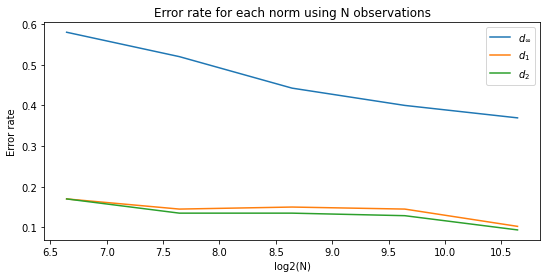

In [23]:
w, h = plt.figaspect(0.45)
fig = plt.figure('error rates plots',figsize=(w,h))
ax = plt.axes()

ax.plot(np.log2(Ns), error_matrix)
ax.legend(("$d_{\infty}$", "$d_1$", "$d_2$"))
ax.set_xlabel("log2(N)")
ax.set_ylabel("Error rate")
ax.set_title("Error rate for each norm using N observations")

It seems that the error rate tends to decrease as $N$ increases, as one would have expected, and the distance function $d_2$ seems the best performing one.


# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain $\Omega=$`[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600


### **Solution**
The first thing to do in order to define the new distance function was to explicitly define how the integral and the derivatives were approximated.

#### Integral

The integral was approximated using the numpy function `trapz`, which implements the trapezoid rule,  twice.

In [24]:
def integral(f):
    x_grid = np.linspace(0, 27, 28)
    y_grid = np.linspace(0, 27, 28)
    return np.trapz(np.trapz(f, y_grid, axis=0), x_grid, axis=0)

In [25]:
def norm_images(f):
    return f/integral(f)

#### Derivative
The derivative was approximated using Central Finite Difference in 2D. Using this technique on a grid indexed by `i`,`j` returns the following formulas:
$$
\frac{\partial f_{ij}}{\partial x} = \frac{f_{i+1, j} - f_{i-1, j}}{2 \Delta x} \qquad \frac{\partial f_{ij}}{\partial y} = \frac{f_{i, j+1} - f_{i, j-1}}{2 \Delta y}
$$
There is a numpy function that does this and it is called `gradient`. This function uses the central finite differences in the middle and left and right finite differences at the borders to calculate the partial derivatives of a given function. Given that in our images the values near the border tend to be zeros the result obtained using the numpy function `gradient` will not be much different from the one we would have obtained by using the central finite difference for each point of the grid.

The function defined below `np_derivatives` implements the `gradient` function.


In [26]:
def np_derivatives(f):
    derivative_x = np.gradient(f)[0]
    derivative_y = np.gradient(f)[1]
    return derivative_x, derivative_y

The function was then timed using a random image of the training set as an example to see how it performed.

In [27]:
%%timeit
a = norm_images(x_train[np.random.randint(0, 60000-1)])
dx, dy = np_derivatives(a)

274 µs ± 5.43 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The function appears to be fast.

Below is reported the function used to approximate the $H^1$ distance, `d_H1`.

The function takes as input the pre-computed normalized images (i.e. $\frac{f_1}{\int_\Omega f_1}$) and their pre-computed partial derivatives with respect to both x and y. Pre-computing the needed quantities and passing them as arguments to the function made it faster that it would have been if those quantities had to be calculated inside the function.

In [28]:
def d_h1(f1, f2, dxf1, dxf2, dyf1, dyf2):
    dx = dxf1 - dxf2
    dy = dyf1 - dyf2
    z = np.square(dx) + np.square(dy) + np.square(f1-f2)
    int_z = integral(z)
    return np.sqrt(int_z)

The function below `distMatrix_h1` computes the distance matrix for the H1 distance with the pre-computed quantities described above.




In [29]:
def distMatrix_h1(x_std, dxs, dys):
    N = len(x_std)
    D = np.zeros((N, N))
    for i in range(0, N):
        for j in range(0, i):
            D[i, j] = d_h1(x_std[i], x_std[j], dxs[i], dxs[j], dys[i], dys[j])
            D[j, i] = D[i, j]
    return D

Below all the needed quantities were precomputed.


In [30]:
# Normalized images
x_train_norm = [norm_images(x_train[i]) for i in range(len(x_train))]

# Partial derivatives with respect to both x and y
dxs_train = np.zeros_like(x_train)
dys_train = np.zeros_like(x_train)

for i in range(len(x_train)):
    dxs_train[i], dys_train[i] = np_derivatives(x_train_norm[i])


The new distance function was then timed using two random normalized images and their partial derivatives.


In [31]:
%%timeit
a=np.random.randint(0, 60000-1)
b=np.random.randint(0, 60000-1)
dist_a_b = d_h1(x_train_norm[a], x_train_norm[b], dxs_train[a], dxs_train[b], dys_train[a], dys_train[b])

246 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The new distance function $H^1$ seems to be about $10$ times slower than the other distance functions.

The function `errors` used to compute the error rate for varying values of N was modified below to include the additional arguments for the precomputed quantities.


In [32]:
def errors(Ns,train_std, dxs, dys):
  x = np.zeros(len(Ns), dtype=float)
  Ns = sorted(Ns, reverse = True)  
  k = len(Ns)-1
  d1=distMatrix_h1(train_std[0:Ns[0]], dxs[0:Ns[0]], dys[0:Ns[0]])
  for N in Ns:
    d1_iter=d1[0:N, 0:N]
    x[k]=countFailures(d1_iter)
    k -= 1
  return x

The code was then run to obtain the error rates in the same way as above, and the error rates for the $H^1$ norm were added to the previous ones.


In [33]:
Ns = np.array([100, 200, 400, 800, 1600])
DH1_error = errors(Ns, x_train_norm, dxs_train, dys_train) 
DH1_error

array([0.23   , 0.18   , 0.15   , 0.12125, 0.09875])

In [34]:
error_matrix2 = np.column_stack((error_matrix, DH1_error))
error_matrix2

array([[0.58    , 0.17    , 0.17    , 0.23    ],
       [0.52    , 0.145   , 0.135   , 0.18    ],
       [0.4425  , 0.15    , 0.135   , 0.15    ],
       [0.4     , 0.145   , 0.12875 , 0.12125 ],
       [0.369375, 0.1025  , 0.09375 , 0.09875 ]])

The table above represents the error rates of the different distance functions for increasing number of observations of `x_train`.

The $d_2$ distance still seems to be the best performing distance function.

The error rates were then plotted again to include the one obtained using the $H^1$ norm.

Text(0.5, 1.0, 'Error rate for each norm using N observations')

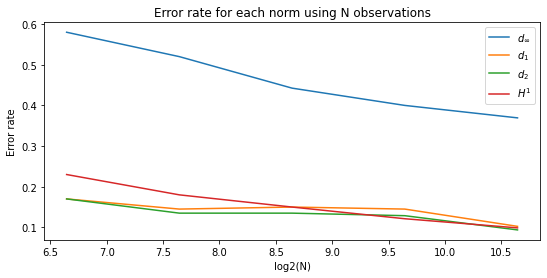

In [35]:
w, h = plt.figaspect(0.45)
fig = plt.figure('error rates plots',figsize=(w,h))
ax = plt.axes()

ax.plot(np.log2(Ns), error_matrix2)
ax.legend(("$d_{\infty}$", "$d_1$", "$d_2$", "$H^1$"))
ax.set_xlabel("log2(N)")
ax.set_ylabel("Error rate")
ax.set_title("Error rate for each norm using N observations")

# Assigment 7

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses a distance from the steps defined above**.

For N in `[3200, 6400]` and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.

### **Solution**


#### 1 Nearest Neighbour - $d_\infty$, $d_1$, $d_2$
The first necessary thing to do was to import the `BallTree` algorithm.


In [36]:
from sklearn.neighbors import BallTree

The data had to be reshaped because the `BallTree` function takes as an input a two dimensional array, with each row corresponding to one observation. This was not a problem as long as we were working with one of the first three distance functions, since they are simply elementwise comparisons. 

In order to work with the $H^1$ distance some adjustments had to be made so it will be reported later.

Reported below the function that computes the error rates using the first N observations in the training set to construct the Ball Tree. It was constructed using the function `query()` of the `BallTree`, which returns the distance and the index of the closest observation (according to the selected distance) in the training set.



In [37]:
new_x_train= x_train.reshape(len(x_train), 28*28)
new_x_test= x_test.reshape(len(x_test), 28*28)

In [38]:
def errors_tree( N, dist):
    train = new_x_train[0:N]
    btree = BallTree(train, metric = dist)
    error_counter = 0
    dist, ind = btree.query(new_x_test)
    y_pred = y_train[ind.flatten()]
    error_rate = np.mean(y_pred != y_test)
    return error_rate

By looking at the documentation of `BallTree.valid_metrics` it was found that:
 - 'cityblock': corresponds to the d_one distance defined above.
 - 'euclidean': corresponds to the d_two distance defined above.
 - 'chebyshev': corresponds to the d_infty distance defined above.

Reported below the error rates of the first three distances for the first `N` entries of `new_x_train`. 

In [39]:
# Range of training sizes to use.
Ns = np.array([100, 200, 400, 800, 1600, 3200, 6400])

In [40]:
# d_infinity
errors_infty= np.zeros(len(Ns), dtype=float)
i=0
for N in Ns:
    errors_infty[i] = errors_tree(N = N, dist = 'chebyshev')
    i+=1

In [41]:
# d_one 
errors_1= np.zeros(len(Ns), dtype=float)
i=0
for N in Ns:
    errors_1[i] = errors_tree(N = N, dist = 'cityblock')
    i+=1

In [42]:
# d_two 
errors_2= np.zeros(len(Ns), dtype=float)
i=0
for N in Ns:
    errors_2[i] = errors_tree(N = N, dist = 'euclidean')
    i+=1

In [43]:
error_rates_1neighbour = np.column_stack((errors_infty, errors_1, errors_2))
error_rates_1neighbour

array([[0.6816, 0.3383, 0.3206],
       [0.6174, 0.2631, 0.249 ],
       [0.5517, 0.2015, 0.1836],
       [0.4987, 0.154 , 0.1406],
       [0.4266, 0.1212, 0.1086],
       [0.3661, 0.0908, 0.0783],
       [0.3123, 0.0745, 0.0631]])

The function was also timed for $N=100$ to get an idea of how efficient it was.


In [44]:
%%timeit
e_infty = errors_tree(100,'chebyshev')

1.37 s ± 78.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
%%timeit
e_1 = errors_tree(100,'cityblock')

1.31 s ± 51.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%%timeit
e_2 = errors_tree(100,'euclidean')

1.95 s ± 694 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 1 Nearest Neighbour - $H^1$

To work with our defined $H^1$ distance some adjustments were needed.

First two new datasets were created, `x_train_norm2` and `x_test_norm2`, to contain the images and their gradient in the same line.


In [47]:
x_train_norm2 = np.zeros((len(x_train), 28*28*3))
for i in range(len(x_train)):
    x_train_norm2[i] = np.concatenate((x_train_norm[i].reshape(28*28), dxs_train[i].reshape(28*28), dys_train[i].reshape(28*28)))

Then the distance function had to be adjusted to reshape the data as the original matrices in order to work like before.


In [48]:
   def d_h1_new(f1, f2):
    dxf1 = f1[784:1568].reshape(28, 28)
    dxf2 = f2[784:1568].reshape(28, 28)
    dyf1 = f1[1568:].reshape(28, 28)
    dyf2 = f2[1568:].reshape(28, 28)
    f1 = f1[0:784].reshape(28, 28)
    f2 = f2[0:784].reshape(28, 28)

    dx = dxf1 - dxf2
    dy = dyf1 - dyf2
    z = np.square(dx) + np.square(dy) + np.square(f1-f2)
    int_z = integral(z)
    return np.sqrt(int_z)

The test set was divided and only 1000 of its observations were considered. This was done because the computational time of the functions related to $H^1$ was much greater than the time it took for the other distances and by considering only 10% of the test set it was more manageable.

Then all the quantities of the test set needed to work with the $H^1$ distance were pre-computed, as the ones for the training set were already available.

The new dataset was stored in `x_test_norm2`.


In [49]:
from sklearn.model_selection import train_test_split

x_left, x_test_reduced, y_left, y_test_reduced = train_test_split(x_test, y_test, test_size = 0.1, shuffle = True, random_state = 100, stratify=y_test)

In [50]:
# Normalized images
x_test_norm = [norm_images(x_test_reduced[i]) for i in range(len(x_test_reduced))]

# Partial derivatives with respect to both x and y
dxs_test= np.zeros_like(x_test_norm)
dys_test= np.zeros_like(x_test_norm)

for i in range(len(x_test_norm)):
    dxs_test[i], dys_test[i] = np_derivatives(x_test_norm[i])

# Obtain an array witn the desired shape.
x_test_norm2 = np.zeros((len(x_test_norm), 28*28*3))
for i in range(len(x_test_norm)):
    x_test_norm2[i] = np.concatenate((x_test_norm[i].reshape(28*28), dxs_test[i].reshape(28*28), dys_test[i].reshape(28*28)))

After these adjustments were made it was possible to write the function that computes the error rates using the first N observations in the training set to construct the Ball Tree for the $H^1$ distance.

In [51]:
def errors_tree_h1(N):
    train = x_train_norm2[0:N]

    btree = BallTree(train, metric = d_h1_new)
        
    error_counter = 0
    dist, ind = btree.query(x_test_norm2)
    
    y_pred = y_train[ind.flatten()]
    error_rate = np.mean(y_pred != y_test_reduced)

    return error_rate

The function was then timed for $N=100$ to get an idea of how efficient it was.


In [52]:
%%timeit
e_h1 = errors_tree_h1(100)

16.5 s ± 295 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This function takes considerably longer than the one used for the computation of the error rates using one of the first three distances. It was expected considering that the other distances were found between the valid metrics of the `BallTree` and those faster functions were used instead of the ones we made ourselves. In this case the function `errors_tree_h1` had to use our distance $H^1$, which is the slowest distance function of the four we implemented.



In [53]:
# H1 
errors_h1= np.zeros(len(Ns), dtype=float)
i=0
for N in Ns:
    errors_h1[i] = errors_tree_h1(N = N)
    i+=1

In [54]:
error_rates_1neighbour = np.column_stack((errors_infty, errors_1, errors_2, errors_h1))
error_rates_1neighbour

array([[0.6816, 0.3383, 0.3206, 0.341 ],
       [0.6174, 0.2631, 0.249 , 0.275 ],
       [0.5517, 0.2015, 0.1836, 0.203 ],
       [0.4987, 0.154 , 0.1406, 0.169 ],
       [0.4266, 0.1212, 0.1086, 0.136 ],
       [0.3661, 0.0908, 0.0783, 0.079 ],
       [0.3123, 0.0745, 0.0631, 0.065 ]])

The table above contains the error rate obtained considering only one neighbour, so assigning to each observation in the test set the same label as the closest observation in the training set.
The rows correspond to the increasing number of considered observations of the training set $\{100, 200, 400, ..., 6400\}$ while the columns correspond to $d_\infty, d_1, d_2, H^1$ distances.

By looking at the table it appears that using $d_2$ distance to assign the nearest neighbour leads to smaller error rates than using the other distances.

Reported below there is the plot of the error rate for each distance for an increasing number of observations in the training set.

Text(0.5, 1.0, 'Error rate for each norm using N observations')

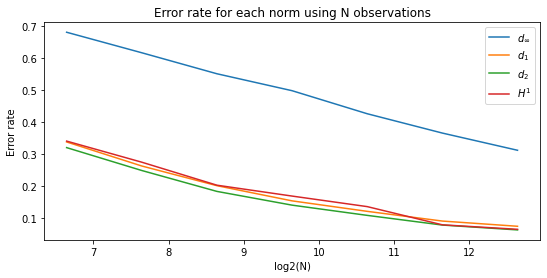

In [55]:
w, h = plt.figaspect(0.45)
fig = plt.figure('error rates plots',figsize=(w,h))
ax = plt.axes()

ax.plot(np.log2(Ns), error_rates_1neighbour)
ax.legend(("$d_{\infty}$", "$d_1$", "$d_2$", "$H^1$"))
ax.set_xlabel("log2(N)")
ax.set_ylabel("Error rate")
ax.set_title("Error rate for each norm using N observations")

#### Different Nearest Neighbours - $d_\infty$, $d_1$, $d_2$

The experiment was then repeated considering a varying number of neighbours and returning the digit with the largest number of occurrences instead of the single closest one. Values considered for the number of neighbours were $k=\{3,5,10,20,50\}$ and for each of them the performance of the `BallTree` was assesed and reported.

As before, the functions needed to compute the error rates using the first three distances were computed before, as they require fewer changes and computational power, and the functions needed for the distance $H^1$ will be reported later.

Reported below the function `errors_tree_ks`, which computes the error rates for the first `N` entries of the training dataset and for a set of `ks`, i.e. number of neighbours, to consider. 

To make the code more efficient the tree was queried only once, for the largest value of `ks`, and then for smaller `k` values only the first `k` observations were considered.

In [56]:
def errors_tree_ks(N, dist, ks):

    ks = sorted(ks, reverse = True)
    error_rate = np.zeros(len(ks))

    train = new_x_train[0:N]

    btree = BallTree(train, metric = dist)
    
    error_counter = 0
    dist, ind = btree.query(new_x_test, ks[0])

    y_pred = np.zeros(len(new_x_test))
    predicteds = y_train[ind]

    s = 1
    for k in ks:
        predicteds = predicteds[:, 0:k]
        for i in range(len(new_x_test)):
            y_pred[i] = np.argmax(np.bincount(predicteds[i]))
        error_rate[len(ks) - s] = np.mean(y_pred != y_test)
        s = s + 1
    
    return error_rate

The function was then applied to each of the three distances $d_\infty$, $d_1$ and $d_2$ and for each number of considered entries of the training set.

A table was printed for each distance where the rows correspond to a value of $k$ ∈ $\{3,5,10,20,50\}$ and the columns to a training set size $N$ ∈ $\{100, 200, ..., 6400\}$.

The results were then plotted for each distance.

In [57]:
ks = np.array([ 3, 5, 10, 20, 50])
k_plot = np.concatenate((np.array([1]), ks)) # will be used for plotting as we add the values for k = 1

In [58]:
# d_infinity
errors_infty2= np.zeros((len(Ns), len(ks)), dtype=float)
i=0
for N in Ns:
    errors_infty2[i] = errors_tree_ks(N = N, dist = 'chebyshev', ks = ks)
    i+=1

In [59]:
# Add the one for k = 1
errors_infty2 = np.row_stack((errors_infty, errors_infty2.T))
errors_infty2

array([[0.6816, 0.6174, 0.5517, 0.4987, 0.4266, 0.3661, 0.3123],
       [0.699 , 0.6571, 0.5894, 0.5421, 0.4765, 0.4109, 0.3558],
       [0.6753, 0.6433, 0.5612, 0.5281, 0.4601, 0.399 , 0.3375],
       [0.672 , 0.6368, 0.5701, 0.5278, 0.462 , 0.4023, 0.3457],
       [0.697 , 0.645 , 0.5635, 0.5239, 0.461 , 0.4057, 0.3549],
       [0.7441, 0.6649, 0.582 , 0.5267, 0.4685, 0.4207, 0.3698]])

Text(0.5, 1.0, 'Error rate for $d_\\infty$ distance')

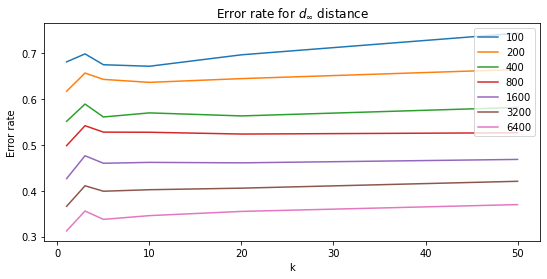

In [60]:
w, h = plt.figaspect(0.45)

fig = plt.figure('error rates for d_1',figsize=(w,h))
ax = plt.axes()

ax.plot(k_plot, errors_infty2)
ax.legend(("100", "200", "400", "800", "1600", "3200", "6400"), loc= 'upper right')
ax.set_xlabel("k")
ax.set_ylabel("Error rate")
ax.set_title("Error rate for $d_\infty$ distance")

In [61]:
# d_one
errors_one= np.zeros((len(Ns), len(ks)), dtype=float)
i=0
for N in Ns:
    errors_one[i] = errors_tree_ks(N = N, dist = 'cityblock', ks = ks)
    i+=1

In [62]:
# Add the one for k = 1
errors_one = np.row_stack((errors_1, errors_one.T))
errors_one

array([[0.3383, 0.2631, 0.2015, 0.154 , 0.1212, 0.0908, 0.0745],
       [0.3733, 0.3043, 0.2287, 0.1697, 0.1287, 0.0921, 0.0743],
       [0.4001, 0.3238, 0.2382, 0.1691, 0.1333, 0.0958, 0.0758],
       [0.4531, 0.3579, 0.2767, 0.1901, 0.1439, 0.1017, 0.0838],
       [0.5422, 0.4365, 0.3317, 0.2313, 0.173 , 0.1164, 0.0925],
       [0.7343, 0.5713, 0.4254, 0.3063, 0.232 , 0.1595, 0.1206]])

Text(0.5, 1.0, 'Error rate for $d_1$ distance')

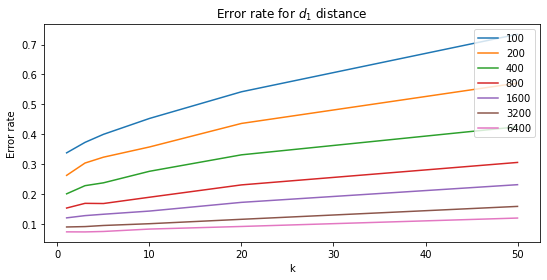

In [63]:
w, h = plt.figaspect(0.45)
fig = plt.figure('error rates for d_1',figsize=(w,h))
ax = plt.axes()

ax.plot(k_plot, errors_one)
ax.legend(("100", "200", "400", "800", "1600", "3200", "6400"), loc= 'upper right')
ax.set_xlabel("k")
ax.set_ylabel("Error rate")
ax.set_title("Error rate for $d_1$ distance")

In [64]:
# d_two
errors_two= np.zeros((len(Ns), len(ks)), dtype=float)
i=0
for N in Ns:
    errors_two[i] = errors_tree_ks(N = N, dist = 'euclidean', ks = ks)
    i+=1

In [65]:
# Add the one for k = 1
errors_two = np.row_stack((errors_2, errors_two.T))
errors_two

array([[0.3206, 0.249 , 0.1836, 0.1406, 0.1086, 0.0783, 0.0631],
       [0.3524, 0.2854, 0.2092, 0.1499, 0.1125, 0.0798, 0.063 ],
       [0.3768, 0.3004, 0.2229, 0.1515, 0.1158, 0.0799, 0.0643],
       [0.4251, 0.335 , 0.2504, 0.1679, 0.1262, 0.0877, 0.0712],
       [0.5053, 0.3965, 0.3018, 0.2011, 0.1491, 0.1007, 0.0814],
       [0.6867, 0.5315, 0.3879, 0.2709, 0.2021, 0.1363, 0.1016]])

Text(0.5, 1.0, 'Error rate for $d_2$ distance')

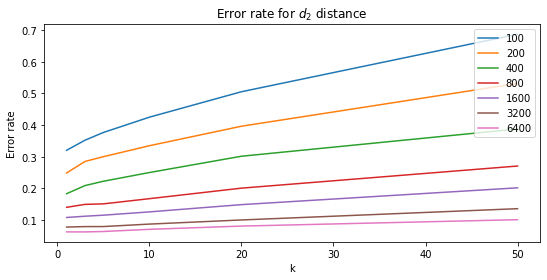

In [66]:
w, h = plt.figaspect(0.45)
fig = plt.figure('error rates for d_2',figsize=(w,h))
ax = plt.axes()

ax.plot(k_plot, errors_two)
ax.legend(("100", "200", "400", "800", "1600", "3200", "6400"), loc= 'upper right')
ax.set_xlabel("k")
ax.set_ylabel("Error rate")
ax.set_title("Error rate for $d_2$ distance")

#### Different Nearest Neighbours - $H^1$

A different function, `errors_tree_h1_ks`, had to be written for the distance function $H^1$, as it was done before.



In [67]:
def errors_tree_h1_ks(N, ks):
    
    ks = sorted(ks, reverse = True)
    error_rate = np.zeros(len(ks))

    train = x_train_norm2[0:N]

    btree = BallTree(train, metric = d_h1_new)
    
    error_counter = 0
    dist, ind = btree.query(x_test_norm2, ks[0]) # Query largest requested one for closest neighbours.

    y_pred = np.zeros(len(x_test_norm2))
    predicteds = y_train[ind]

    s = 1
    for k in ks:
        predicteds = predicteds[:, 0:k]
        for i in range(len(x_test_norm2)):
            y_pred[i] = np.argmax(np.bincount(predicteds[i]))
        error_rate[len(ks) - s] = np.mean(y_pred != y_test_reduced)
        s = s + 1

    return error_rate

In [68]:
# H1
errors_H1= np.zeros((len(Ns), len(ks)), dtype=float)
i=0
for N in Ns:
    errors_H1[i] = errors_tree_h1_ks(N = N, ks = ks)
    i+=1

In [69]:
# Add the one for k = 1
errors_H1 = np.row_stack((errors_h1, errors_H1.T))
errors_H1

array([[0.341, 0.275, 0.203, 0.169, 0.136, 0.079, 0.065],
       [0.403, 0.337, 0.248, 0.189, 0.124, 0.088, 0.054],
       [0.453, 0.384, 0.262, 0.181, 0.132, 0.094, 0.066],
       [0.542, 0.405, 0.297, 0.218, 0.145, 0.104, 0.068],
       [0.691, 0.461, 0.352, 0.252, 0.175, 0.115, 0.092],
       [0.886, 0.602, 0.403, 0.314, 0.219, 0.138, 0.12 ]])

Text(0.5, 1.0, 'Error rate for $H^1$ distance')

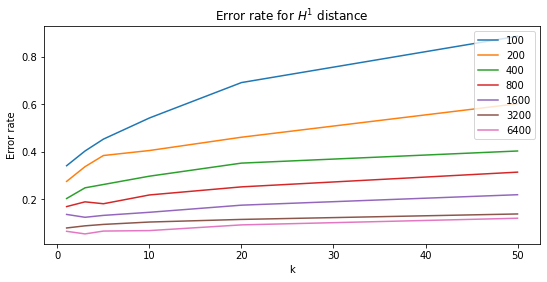

In [70]:
w, h = plt.figaspect(0.45)
fig = plt.figure('error rates for H1',figsize=(w,h))
ax = plt.axes()

ax.plot(k_plot, errors_H1)
ax.legend(("100", "200", "400", "800", "1600", "3200", "6400"), loc= 'upper right')
ax.set_xlabel("k")
ax.set_ylabel("Error rate")
ax.set_title("Error rate for $H^1$ distance")

All of these plots show that the error rate tends to increase as the number of considered nearest neighbours increases, regardless of the distance funtion used or the considered number of entries of the training set. Based on these results considering ulterior values for $k$ seem pointless, as the best one seems to be $1$.